# Week 01 Homework Assignment - Data Exploration

I will be exploring the [California Fire Perimeters (All)](https://data.ca.gov/dataset/california-fire-perimeters-all1) dataset, which was published by CA Natural Resources Agency.

## Importing the Data

I import the geopandas library and import the data into a geodatframe, giving it the name 'fireperimeters'. I will be able to use the handle 'fireperimeters' to refer to the dataset in the data exploration.

In [26]:
# first, import the geopandas library
import geopandas

In [2]:
# next, import the data
fireperimeters = geopandas.read_file('data/California_Fire_Perimeters_(all).zip')

In [4]:
# what's the data type?
type(fireperimeters)

geopandas.geodataframe.GeoDataFrame

## Exploring the Data
I checked out the first (head) 5 entries of the dataset. They are printed below.

In [20]:
# what does the data look like?
fireperimeters.head()

OBJECTID YEAR_ STATE AGENCY UNIT_ID FIRE_NAME   INC_NUM  ALARM_DATE  \
0     21440  2020    CA    CDF     NEU    NELSON  00013212  2020-06-18   
1     21441  2020    CA    CDF     NEU   AMORUSO  00011799  2020-06-01   
2     21442  2020    CA    CDF     NEU    ATHENS  00018493  2020-08-10   
3     21443  2020    CA    CDF     NEU   FLEMING  00007619  2020-03-31   
4     21444  2020    CA    CDF     NEU  MELANESE  00008471  2020-04-14   

    CONT_DATE  CAUSE COMMENTS  REPORT_AC   GIS_ACRES  C_METHOD  OBJECTIVE  \
0  2020-06-23   11.0     None      110.0  109.602501       1.0        1.0   
1  2020-06-04    2.0     None      670.0  685.585022       1.0        1.0   
2  2020-03-01   14.0     None       26.0   27.300480       1.0        1.0   
3  2020-04-01    9.0     None       13.0   12.931550       1.0        1.0   
4  2020-04-19   18.0     None       10.3   10.315960       1.0        1.0   

  FIRE_NUM    SHAPE_Leng    SHAPE_Area  \
0     None   4179.743142 -7.331347e+05   
1     None  12399.375391 -4.578172e+06   
2     None   2119.194120 -1.823876e+05   
3     None   2029.524881 -8.667942e+04   
4     None   1342.742903 -7.017912e+04   

                                            geometry  
0  POLYGON ((-13508443.877 4705925.941, -13508437...  
1  POLYGON ((-13508927.937 4695976.336, -13508919...  
2  POLYGON ((-13506766.482 4699576.903, -13506741...  
3  POLYGON ((-13500068.676 4716384.732, -13500054...  
4  POLYGON ((-13503128.528 4791692.607, -13503101...

I also printed the dimensions of the dataset. They show that the dataset has 21318 entries (wildfires) and 19 fields associated with each entry.

In [ ]:
# this outputs the dimensions of the dataset
fireperimeters.shape

(21318, 19)

<AxesSubplot:>

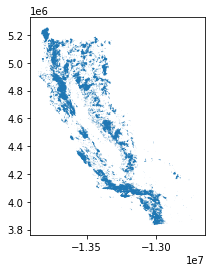

In [5]:
# the plot command plots all of the entries in the dataset
fireperimeters.plot()

Woo! It looks like a map of California wildfires, as expected.

## Filtering the Data

I filtered the dataset by accessing the columns of the geodataframe. With that, I could create abridged tables and plot histograms from the dataset.

In [10]:
# this provides another summary of the data, including the data types and counts of non-null entries associated with each column.
fireperimeters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21318 entries, 0 to 21317
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21318 non-null  int64   
 1   YEAR_       21241 non-null  object  
 2   STATE       21315 non-null  object  
 3   AGENCY      21313 non-null  object  
 4   UNIT_ID     21295 non-null  object  
 5   FIRE_NAME   14702 non-null  object  
 6   INC_NUM     20392 non-null  object  
 7   ALARM_DATE  15954 non-null  object  
 8   CONT_DATE   8638 non-null   object  
 9   CAUSE       21270 non-null  float64 
 10  COMMENTS    2911 non-null   object  
 11  REPORT_AC   8767 non-null   float64 
 12  GIS_ACRES   21311 non-null  float64 
 13  C_METHOD    9096 non-null   float64 
 14  OBJECTIVE   21123 non-null  float64 
 15  FIRE_NUM    17259 non-null  object  
 16  SHAPE_Leng  21318 non-null  float64 
 17  SHAPE_Area  21318 non-null  float64 
 18  geometry    21318 non-null  geometry
d

In [15]:
# I can access one of the columns of the dataset by its column name:
fireperimeters['SHAPE_Area']

0       -7.331347e+05
1       -4.578172e+06
2       -1.823876e+05
3       -8.667942e+04
4       -7.017912e+04
             ...     
21313   -3.730642e+04
21314   -5.024716e+04
21315   -3.843117e+05
21316   -4.051741e+05
21317   -5.233553e+07
Name: SHAPE_Area, Length: 21318, dtype: float64

In [19]:
# Here I can get a histogram of the CALFIRE 'units' associated with each fire. THe most common is 'LAC' or LA County.
fireperimeters['UNIT_ID'].value_counts()

LAC    1992
CNF    1018
SRF     962
BDF     863
RRU     832
       ... 
FNF       1
APF       1
CRA       1
APV       1
VLJ       1
Name: UNIT_ID, Length: 89, dtype: int64

In [34]:
# Save a year histogram as a variable
year_count = fireperimeters['YEAR_'].value_counts().reset_index()

# Rename the columns
year_count.columns = ['year','count']
year_count

year  count
0    2017    607
1    2020    500
2    2008    438
3    2018    413
4    1979    366
..    ...    ...
118  1878      1
119  1902      1
120  1895      1
121  1896      1
122  1905      1

[123 rows x 2 columns]

<AxesSubplot:title={'center':'Number of Wildfires per Year Tracked by California Natural Resources Agency'}, xlabel='year'>

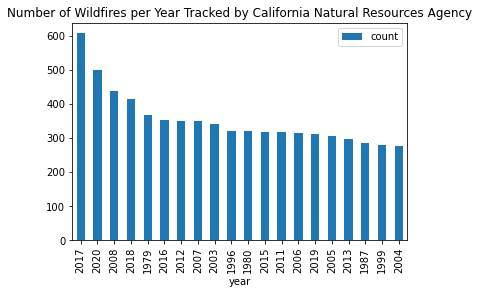

In [38]:
# sample the top 20 years and plot into a bar graph
year_count.head(20).plot.bar(x = 'year', y = 'count', title = 'Number of Wildfires per Year Tracked by California Natural Resources Agency')

## Mapping the Data

### Mapping with plot()
I included two maps of wildfires recorded in 2020. The latter includes a legend describing the CAL FIRE unit associated with the fire. 

<AxesSubplot:>

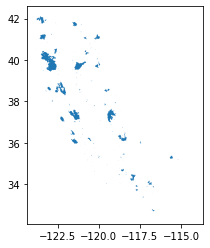

In [15]:
# I filtered only the entries of fires occurring in 2020.
fireperimeters2020 = fireperimeters[fireperimeters.YEAR_ == '2020']
# Now I can plot the 
fireperimeters2020.plot()

<AxesSubplot:>

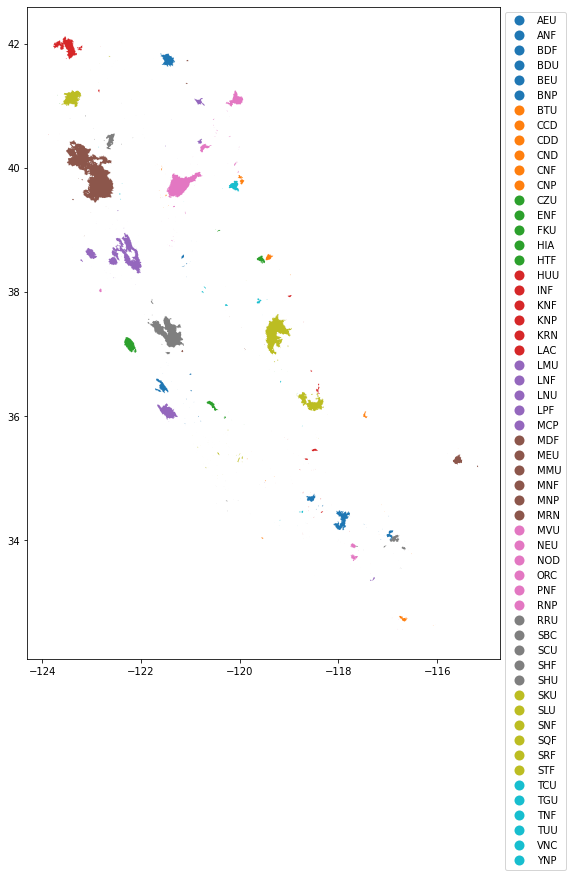

In [39]:
# another plot, color coded by CAL FIRE jurisdiction
fireperimeters2020.plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            column = 'UNIT_ID',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.15,1)
            }                  # this puts the legend to the side
) 

### Mapping with folium

I followed the following [tutorial](https://geopandas.readthedocs.io/en/latest/gallery/polygon_plotting_with_folium.html) from the documentation to plot polygons and then saved the resulting map.

In [22]:
import folium
import matplotlib.pyplot as plt

# Create the map and center it around the state of California
m = folium.Map(location=[37, -119], zoom_start=4, tiles='CartoDB positron')
m

In [21]:
# add the polygons for 2020 wildfires.
for _, r in fireperimeters2020.iterrows():
    # Simplify the geometry
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    # Convert to geojson
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    # Add the fire name to the popup 
    folium.Popup(r['FIRE_NAME']).add_to(geo_j)
    # Add the geo json to the map
    geo_j.add_to(m)
m

In [23]:
# Save folium map as HTML file
m.save('2020wildfires.html')